<a href="https://colab.research.google.com/github/MaggieWelch/visualization/blob/main/MW_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
! git clone https://github.com/DS3001/visualization


Cloning into 'visualization'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 34 (delta 4), reused 1 (delta 1), pack-reused 22 (from 1)
Receiving objects: 100% (34/34), 7.18 MiB | 14.13 MiB/s, done.
Resolving deltas: 100% (7/7), done.


Q1. This question provides some practice doing exploratory data analysis and visualization.
1. Load the ./data/college_completion.csv data with Pandas.


In [2]:
import pandas as pd

df = pd.read_csv('college_completion.csv')
print(df.head())


   index  unitid                            chronname        city    state  \
0      0  100654               Alabama A&M University      Normal  Alabama   
1      1  100663  University of Alabama at Birmingham  Birmingham  Alabama   
2      2  100690                   Amridge University  Montgomery  Alabama   
3      3  100706  University of Alabama at Huntsville  Huntsville  Alabama   
4      4  100724             Alabama State University  Montgomery  Alabama   

    level                 control  \
0  4-year                  Public   
1  4-year                  Public   
2  4-year  Private not-for-profit   
3  4-year                  Public   
4  4-year                  Public   

                                               basic hbcu flagship  ...  \
0  Masters Colleges and Universities--larger prog...    X      NaN  ...   
1  Research Universities--very high research acti...  NaN      NaN  ...   
2            Baccalaureate Colleges--Arts & Sciences  NaN      NaN  ...   
3  Resea

2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use .head() to examine the first few rows of data.

In [8]:
df.shape
print(df.shape)

(3798, 63)


The dimension of data is [3798 rows x 63 columns]. There are 3798 observations, which I got from the shape function and using the number of rows as the number of observations. There are 63 variables, gathered from the number of columns.

3. Cross tabulate control and level. Describe the patterns you see.

In [9]:
cross_tab = pd.crosstab(df['control'], df['level'])
print(cross_tab)

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632


This cross tabulation compared the length of the college institution (2 year vs 4 year) with the institution type (private for-profit, private not-for-profit, and public). Some patterns include that when it comes to private not-for- profit institutions, there are significantly more 4 year institutions, making up the most within the data set with 1180. Interestingly, they also make up the *least* amount of 2 year institutions, with 68. With this pattern in mind, it is interesting to look at the ratio of 4 year and 2 year institutions when it comes to private for-profit institutions, where there is the least significant difference out of all three levels. this could be as a result of the fact that private not for profit institutions do not receive government funding and are not aiming to make profit, and so their allocation of funds is likely more deliberate than other institution types. The vast majority that are 4-year institutions likely recognized that a 4-year program would yeild higher student salary upon graduation, resluting in higher alumni salaries overall increasing the liklihood of donations.

4. For grad_100_value, create a histogram, kernel density plot, boxplot, and statistical description.


<Axes: title={'center': 'Histogram of grad_100_value'}, xlabel='grad_100_value', ylabel='Count'>

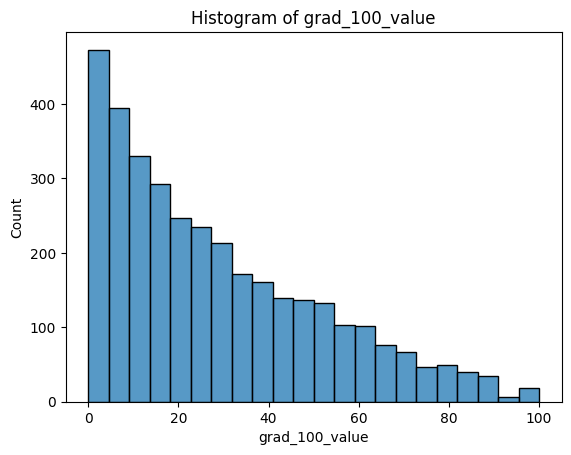

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.title('Histogram of grad_100_value')
sns.histplot(df['grad_100_value'])

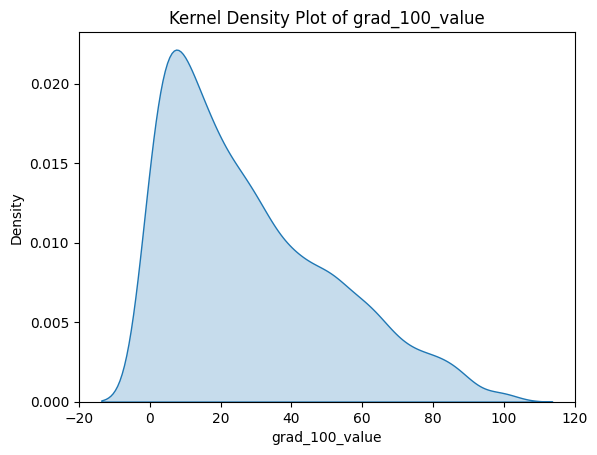

In [24]:
sns.kdeplot(df['grad_100_value'], fill=True)
plt.title('Kernel Density Plot of grad_100_value')
plt.xlabel('grad_100_value')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


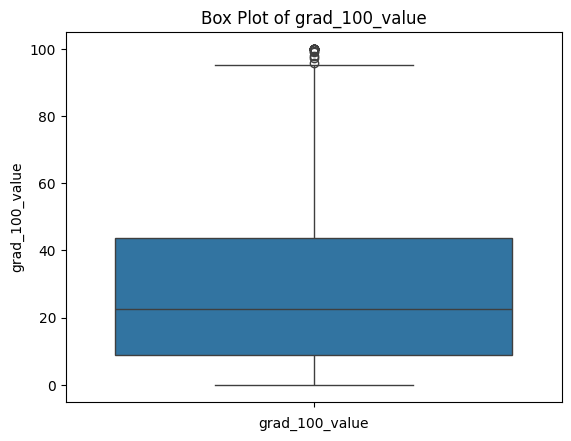

In [26]:
sns.boxplot(df['grad_100_value'])
plt.title('Box Plot of grad_100_value')
plt.xlabel('grad_100_value')
plt.show()

5. For grad_100_value, create a grouped kernel density plot by control and by level. Describe what you see. Use groupby and .describe to make grouped calculations of statistical descriptions of grad_100_value by level and control. Which institutions appear to have the best graduation rates?


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


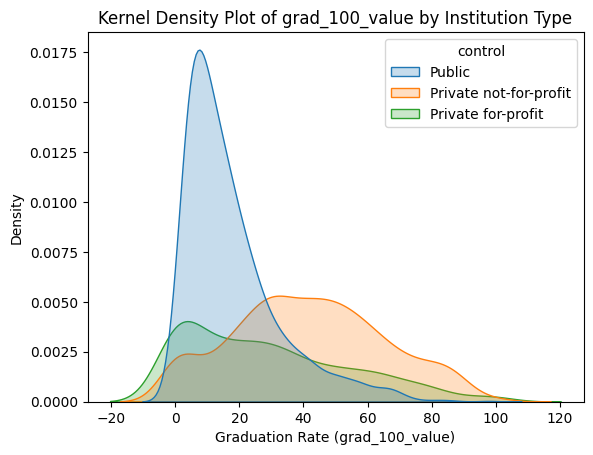

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


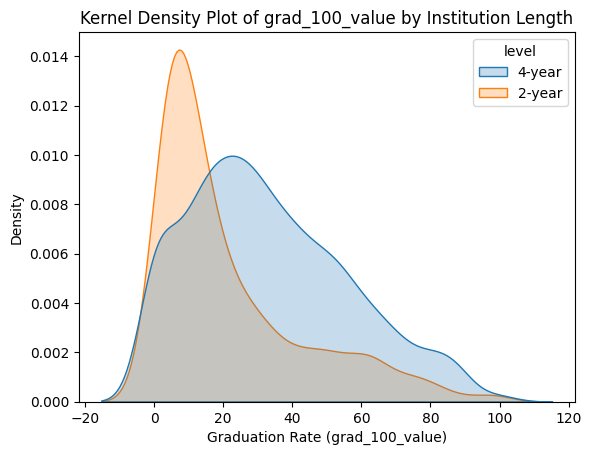

In [31]:
sns.kdeplot(data=df, x='grad_100_value', hue='control', fill=True)
plt.title('Kernel Density Plot of grad_100_value by Institution Type')
plt.xlabel('Graduation Rate (grad_100_value)')
plt.show()


sns.kdeplot(data=df, x='grad_100_value', hue='level', fill=True)
plt.title('Kernel Density Plot of grad_100_value by Institution Length')
plt.xlabel('Graduation Rate (grad_100_value)')
plt.show()


In [34]:
df.loc[:,['control','grad_100_value']].groupby(['control']).describe()

grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8

In [35]:
df.loc[:,['level','grad_100_value']].groupby(['level']).describe()

grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year         2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0

According to these graphs and tables, Private not-for-profit, 4-year institutions have the highest graduation rates

6. Create a new variable, df['levelXcontrol']=df['level']+', '+df['control'] that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?


In [37]:
df['levelXcontrol'] = df['level'] + ', ' + df['control']


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


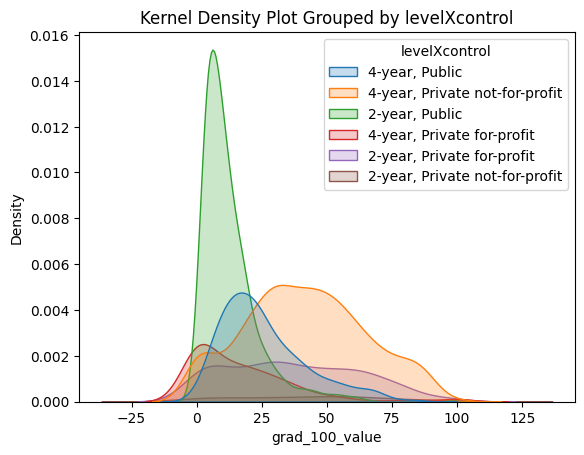

In [40]:
sns.kdeplot(data=df, x='grad_100_value', hue='levelXcontrol', fill=True)
plt.title('Kernel Density Plot Grouped by levelXcontrol')
plt.xlabel('grad_100_value')
plt.show()


4 year private not for profit institutions remain having the highest graduation rates.

7. Make a kernel density plot of aid_value. Now group your graph by level and control. What explains the shape of the graph? Use groupby and .describe to make grouped calculations of statistical descriptions of aid_value by level and control.


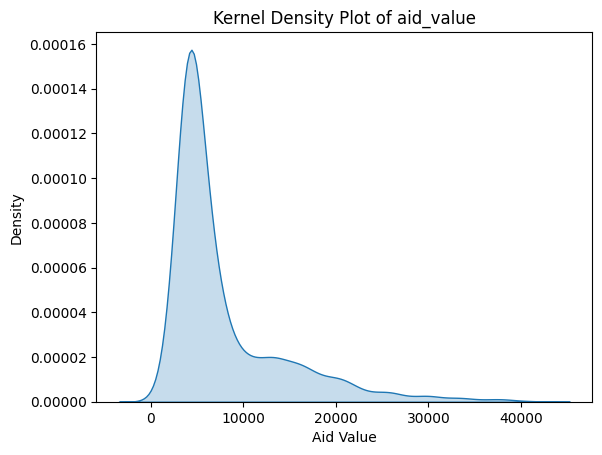

In [42]:
sns.kdeplot(df['aid_value'], fill=True)
plt.title('Kernel Density Plot of aid_value')
plt.xlabel('Aid Value')
plt.show()

<ipython-input-43-897659b60b63>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='aid_value', hue='levelXcontrol', shade=True)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will

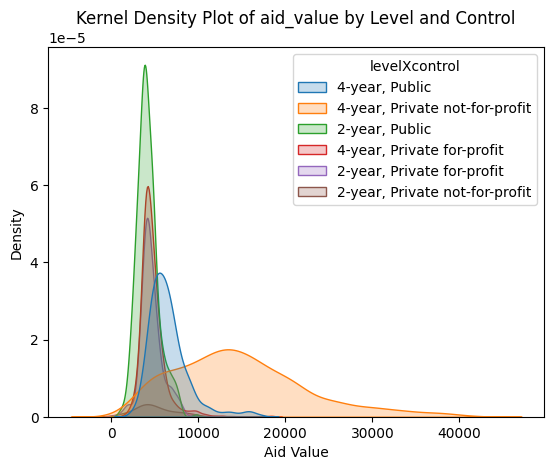

In [43]:
sns.kdeplot(data=df, x='aid_value', hue='levelXcontrol', shade=True)
plt.title('Kernel Density Plot of aid_value by Level and Control')
plt.xlabel('Aid Value')
plt.show()

In [44]:
df.loc[:,['control','aid_value']].groupby('control').describe()

aid_value                                             \
                           count          mean          std    min      25%   
control                                                                       
Private for-profit         991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit    1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                    1558.0   5094.835687  2136.436370  881.0  3725.25   

                                                   
                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0

8. Make a scatterplot of grad_100_value by aid_value. Describe what you see. Now make the same plot, grouping by level and then control. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?


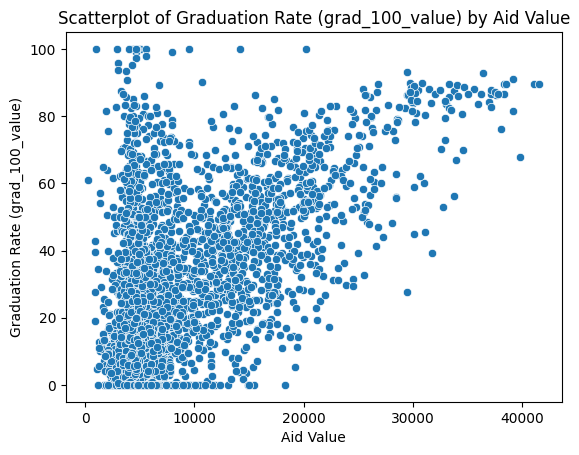

In [45]:
sns.scatterplot(data=df, x='aid_value', y='grad_100_value')
plt.title('Scatterplot of Graduation Rate (grad_100_value) by Aid Value')
plt.xlabel('Aid Value')
plt.ylabel('Graduation Rate (grad_100_value)')
plt.show()


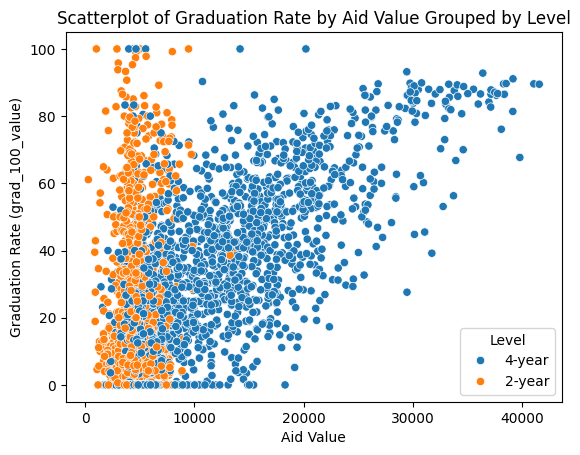

In [46]:
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='level')
plt.title('Scatterplot of Graduation Rate by Aid Value Grouped by Level')
plt.xlabel('Aid Value')
plt.ylabel('Graduation Rate (grad_100_value)')
plt.legend(title='Level')
plt.show()


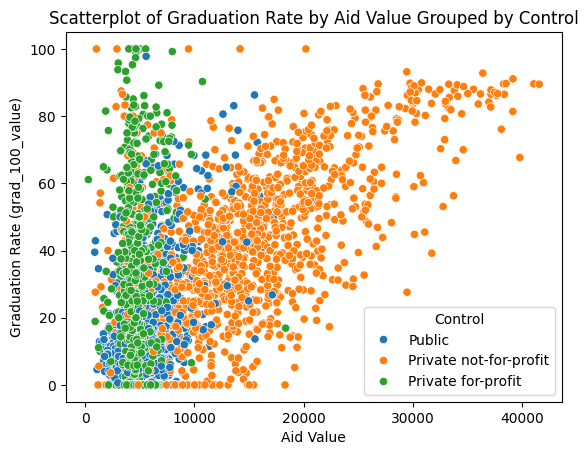

In [47]:
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='control')
plt.title('Scatterplot of Graduation Rate by Aid Value Grouped by Control')
plt.xlabel('Aid Value')
plt.ylabel('Graduation Rate (grad_100_value)')
plt.legend(title='Control')
plt.show()


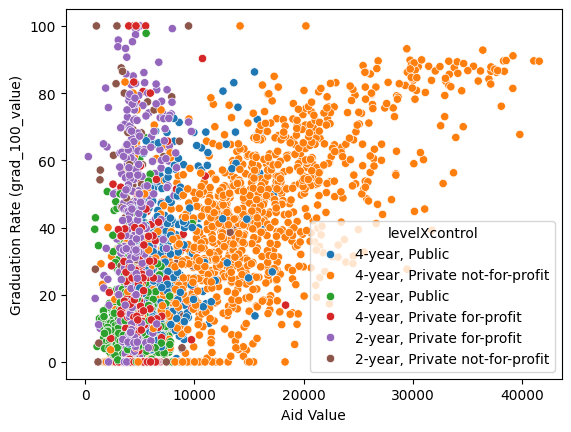

In [49]:
sns.scatterplot(data=df,x='aid_value',y='grad_100_value',hue='levelXcontrol')
plt.xlabel('Aid Value')
plt.ylabel('Graduation Rate (grad_100_value)')
plt.show()

4 year, private not-for-profit institutions have a positive correlation between aid value and graduations, indicating that this form of institution illicits higher gradutation rates as their financial aid increases.

Q4. Go to https://data.cms.gov/search.

1. Pick a dataset about something you are interested in.

I chose the data set of Opioid Treatment Program Providers; https://data.cms.gov/provider-characteristics/medicare-provider-supplier-enrollment/opioid-treatment-program-providers

2. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.

The opioid treatment program providers dictionary does not discuss missing variables. My first impressions of the data dictionary was that it was very easy to read, as it was a simple table with two columns. One column has the term name, and the other column has a corresponding definition of what the term is referring to. However, there is no specific indication of the variable names, which would be nice information to have going into a data analysis.

3. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.

In [29]:
otpp = pd.read_csv('opioid_treatment_program_providers.csv')
otpp

,NPI,PROVIDER NAME,ADDRESS LINE 1,ADDRESS LINE 2,CITY,STATE,ZIP,MEDICARE ID EFFECTIVE DATE,PHONE
0,1003008301,"CENTER FOR COMMUNITY ALTERNATIVES,",25 CHAPEL ST,STE 701,BROOKLYN,NY,11201-1917,5/1/2024,7188589658
1,1003081399 1013055110,BAART BEHAVIORAL HEALTH SERVICES IN,617 COMSTOCK RD,STE 5,BERLIN,VT,05602-8498,1/1/2020,8022232003
2,1003150004,AMS OF WISCONSIN LLC,9532 E 16 FRONTAGE RD,STE 100,ONALASKA,WI,54650-6742,1/1/2020,9202322332
3,1003362484,BHG XLII LLC,5715 PRINCESS ANNE RD,NaN,VIRGINIA BEACH,VA,23462-3222,1/1/2020,7579620748
4,1003368945,RTS EDGEWOOD,2205 PULASKI HIGHWAY,NaN,EDGEWOOD,MD,21040,10/13/2020,4434569001
...,...,...,...,...,...,...,...,...,...
1512,1992861694,WESTSIDE METHADONE TREATMENT PROGRA,1301 PIERCE ST,NaN,SAN FRANCISCO,CA,94115-4005,1/1/2020,4154319000
1513,1992941702,CARNEGIE HILL INSTITUTE INC,116 E 92ND ST,BSMNT,NEW YORK,NY,10128-1620,1/1/2020,2122897166
1514,1992966584,"VCPHCS VII, LLC",5121 CRESTWAY RD,STE 201,WINDCREST,TX,78239-1975,1/1/2020,2102991614
1515,1932253812,SOUTHERN INDIANA CENTER LLC,7509 CHARLESTOWN PIKE,NaN,CHARLESTOWN,IN,47111-9623,1/1/2020,8122564686


In [51]:
state = otpp["STATE"]

date = pd.to_datetime(otpp['MEDICARE ID EFFECTIVE DATE'], format='%m/%d/%Y')
  #from chat gbt^



I chose the variables of state and medicare ID effective date to see if there was a significant difference in the time in which medicare ID was effective for opioid treatment dependant on the state

4. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
5. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
6. Create a scatter plot, and describe the relationship you see

all detailed below with flawed code I could not figure out for the kernal density and bar graph

I am having issues producing a bar graph, when I try and leave the y value as blank to calculate counts, it does not work.

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x= "state", y= 'date', data = otpp)


ValueError: Could not interpret value `state` for `x`. An entry with this name does not appear in `data`.

In [62]:
sns.kdeplot(otpp['state'], fill=True)

KeyError: 'state'

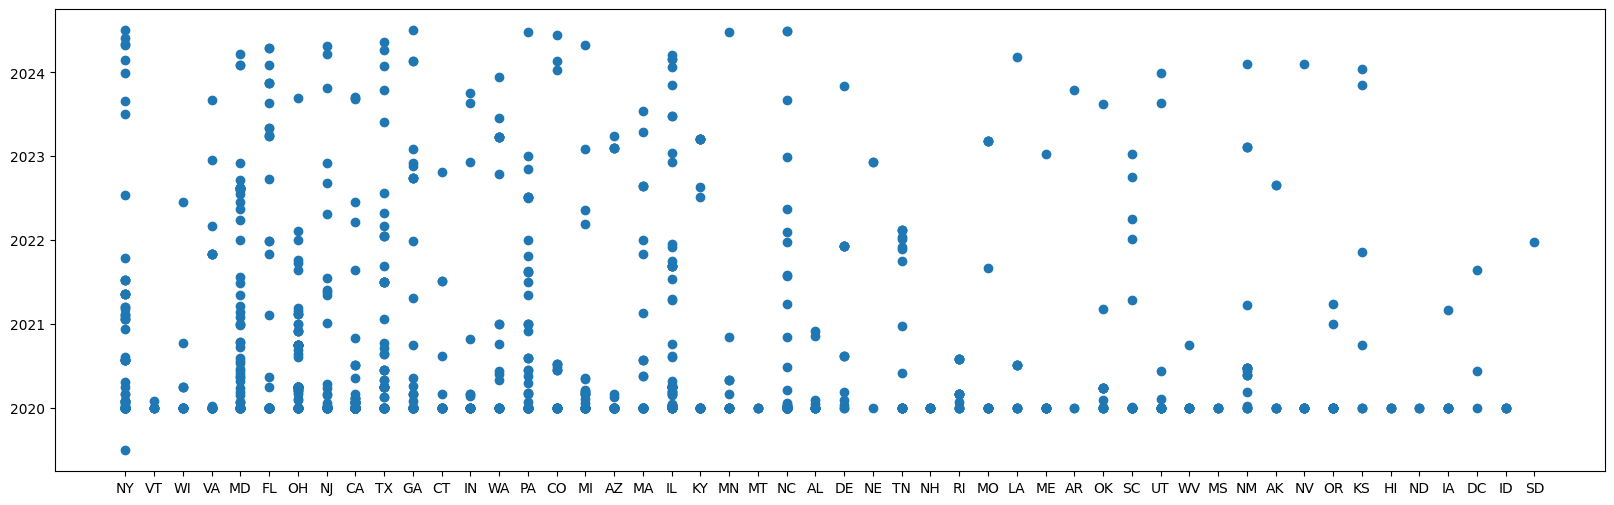

In [61]:
plt.figure(figsize=(20, 6))
plt.scatter(state, date)


For my scatterplot, I had to rescale the size of the plot so that all the states could be represented in the x axis. I did this by increasing the width from 8 to 20. The relationship that I see is that there is a difference between states and the date in which their medicare id was effective for opioid treatment. Most notebly, NY having dates that come before 2020, while South Dakota has one point in 2022. This insinuates differences in medicare effectiveness for opioid treatment programs, with more liberal states such as NY and Vermont having earlier dates of effectiveness, and more conservative states being later to initiating effectiveness. This could be used to derive larger generalizations towards drug policies and reform in states.  

7. Create a table (cross tabulation, variance-covariance, or a .describe() five-number summary), and explain what you see.


In [64]:
otpp.describe

<bound method NDFrame.describe of                         NPI                        PROVIDER NAME  \
0                1003008301   CENTER FOR COMMUNITY ALTERNATIVES,   
1     1003081399 1013055110  BAART BEHAVIORAL HEALTH SERVICES IN   
2                1003150004                 AMS OF WISCONSIN LLC   
3                1003362484                         BHG XLII LLC   
4                1003368945                         RTS EDGEWOOD   
...                     ...                                  ...   
1512             1992861694  WESTSIDE METHADONE TREATMENT PROGRA   
1513             1992941702          CARNEGIE HILL INSTITUTE INC   
1514             1992966584                      VCPHCS VII, LLC   
1515             1932253812          SOUTHERN INDIANA CENTER LLC   
1516             1790700904                ATS AT JHBMC MFL BLDG   

             ADDRESS LINE 1 ADDRESS LINE 2            CITY STATE         ZIP  \
0              25 CHAPEL ST        STE 701        BROOKLYN    NY  11201-1917   
1           617 COMSTOCK RD          STE 5          BERLIN    VT  05602-8498   
2     9532 E 16 FRONTAGE RD        STE 100        ONALASKA    WI  54650-6742   
3     5715 PRINCESS ANNE RD            NaN  VIRGINIA BEACH    VA  23462-3222   
4      2205 PULASKI HIGHWAY            NaN        EDGEWOOD    MD       21040   
...                     ...            ...             ...   ...         ...   
1512         1301 PIERCE ST            NaN   SAN FRANCISCO    CA  94115-4005   
1513          116 E 92ND ST          BSMNT        NEW YORK    NY  10128-1620   
1514       5121 CRESTWAY RD        STE 201       WINDCREST    TX  78239-1975   
1515  7509 CHARLESTOWN PIKE            NaN     CHARLESTOWN    IN  47111-9623   
1516       5200 EASTERN AVE         FL 6-E       BALTIMORE    MD  21224-2734   

     MEDICARE ID EFFECTIVE DATE       PHONE  
0                    2024-05-01  7188589658  
1                    2020-01-01  8022232003  
2                    2020-01-01  9202322332  
3                    2020-01-01  7579620748  
4                    2020-10-13  4434569001  
...                         ...         ...  
1512                 2020-01-01  4154319000  
1513                 2020-01-01  2122897166  
1514                 2020-01-01  2102991614  
1515                 2020-01-01  8122564686  
1516                 2022-01-01  4105500004  

[1517 rows x 9 columns]>

This is what I got when I used the describe function, and so it is hard to make conclusions. In my opinion, I could have picked a better data set with more numerical values for easier manipulation of data